In [1]:
import json, pickle
import sys; sys.path.insert(0, "..")

import editdistance

import numpy as np
import matplotlib.pyplot as plt

from program_synthesis.datasets.dataset import KarelTorchDataset
from program_synthesis.datasets.karel.mutation import KarelIncorrectExampleMutator, KarelExampleMutator

In [2]:
%matplotlib inline

In [3]:
nearai_data = KarelTorchDataset(
    "../data/karel/val.pkl",
    incorrect_mutator=KarelIncorrectExampleMutator.from_path(
        "../baseline/nearai-val.json", False))
mutations3_data = KarelTorchDataset(
    "../data/karel/val.pkl",
    mutator=KarelExampleMutator(np.array([0, 0, 1]), True, False)
)

In [4]:
mutations3_distances = [
    editdistance.eval(datum.code_sequence, datum.ref_example.code_sequence)
    for datum in mutations3_data
]

nearai_distances = [
    editdistance.eval(datum.code_sequence, datum.ref_example.code_sequence)
    for datum in nearai_data
]

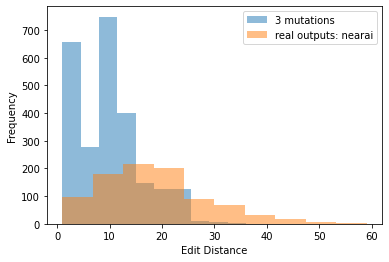

In [5]:
plt.hist(mutations3_distances, label='3 mutations', alpha=0.5)
plt.hist(nearai_distances, label='real outputs: nearai', alpha=0.5)
plt.xlabel("Edit Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [8]:
def plot_distance_graphs(data, outcomes, title):
    correct_distances = []
    correct_distances_to_guess = []
    correct_distances_gold_to_guess = []
    incorrect_distances = []
    for datum, outcome in zip(data, outcomes):
        guess = outcomes[0]['code']['info']['candidates'][0]
        dist_to_gold = editdistance.eval(datum.code_sequence, datum.ref_example.code_sequence)
        dist_to_guess = editdistance.eval(guess, datum.ref_example.code_sequence)
        dist_gold_to_guess = editdistance.eval(guess, datum.code_sequence)
        is_correct = outcome['stats']['correct'] == 6
        if is_correct:
            correct_distances.append(dist_to_gold)
            correct_distances_to_guess.append(dist_to_guess)
            correct_distances_gold_to_guess.append(dist_gold_to_guess)
        else:
            incorrect_distances.append(dist_to_gold)
    plt.hist(correct_distances, alpha=0.5, label='correct')
    plt.hist(incorrect_distances, alpha=0.5, label='incorrect')
    plt.xlabel("d(ref, gold)")
    plt.ylabel("frequency")
    plt.legend()
    plt.title(title)
    plt.show()
    plt.scatter(correct_distances, correct_distances_to_guess, alpha=0.1)
    plt.plot([0, 50], [0, 50])
    plt.ylim(0, 50)
    plt.xlim(0, 50)
    plt.xlabel("d(ref, gold) [mean={:.2f}]".format(np.mean(correct_distances)))
    plt.ylabel("d(ref, correct guess) [mean={:.2f}]".format(np.mean(correct_distances_to_guess)))
    plt.title("Among Correct examples")
    plt.show()
    plt.scatter(correct_distances_gold_to_guess, correct_distances_to_guess, alpha=0.1)
    plt.plot([0, 50], [0, 50])
    plt.ylim(0, 50)
    plt.xlim(0, 50)
    plt.xlabel("d(gold, correct guess) [mean={:.2f}]".format(np.mean(correct_distances_gold_to_guess)))
    plt.ylabel("d(ref, correct guess) [mean={:.2f}]".format(np.mean(correct_distances_to_guess)))
    plt.title("Among Correct examples")
    plt.show()

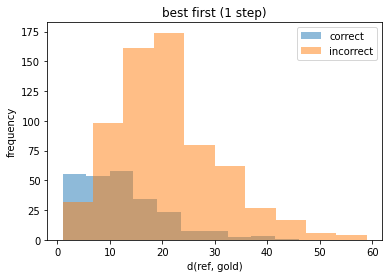

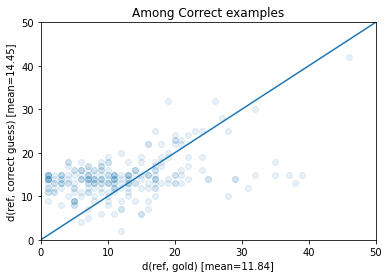

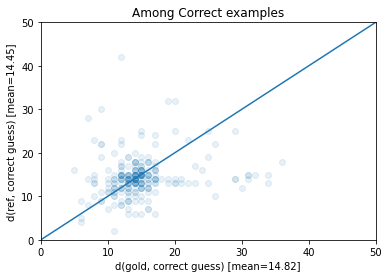

In [9]:
outcome_path = "../logdirs/vanilla,trace_enc==none,batch_size==64,lr==1,lr_decay_steps=100000/report-dev-mnearai,,best_first,,1-1769300-real.jsonl"
outcomes = [json.loads(line) for line in open(outcome_path)][1:]
plot_distance_graphs(nearai_data, outcomes, "best first (1 step)")

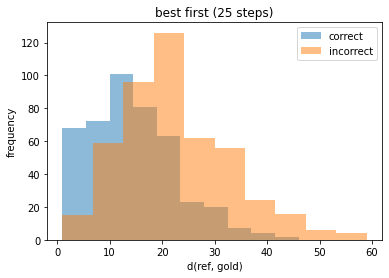

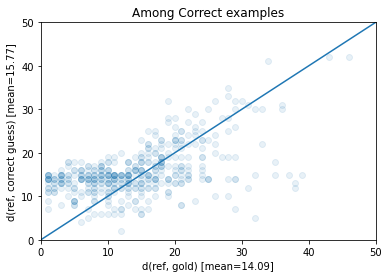

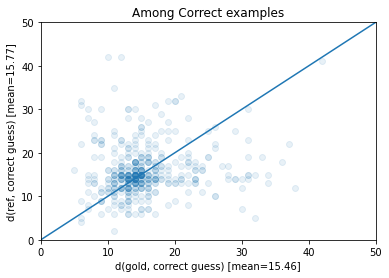

In [10]:
outcome_path = "../logdirs/vanilla,trace_enc==none,batch_size==64,lr==1,lr_decay_steps=100000/report-dev-mnearai,,best_first,,25-1769300-real.jsonl"
outcomes = [json.loads(line) for line in open(outcome_path)][1:]
plot_distance_graphs(nearai_data, outcomes, "best first (25 steps)")